# EDA with python - Netflix data
Using the Netflix datasets used in class.
1. Find number of movies released in each decade from 1945, show a line chart to display this
2. Show the distribution of runtime features using an appropriate chart
3. Show bar chart for movie genres
4. show bar chart for movie genres for children movies
5. Which of the genres have the highest runtime on the overall dataset and for each age group
6. What is the top 5 highest-rated movies or shows?
7. What is the average runtime of movies released in the 1980s?
8. What is the top 3 countries producing the most content?
9. What is the correlation between runtime and IMDb score for 1980s movies?
10. Are there any trends in IMDb scores over the decades (e.g., increasing or decreasing)?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("imdb_movies_shows.csv")
df.head(6)
df.isna().sum()

title                      1
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
dtype: int64

In [3]:
df.dtypes

title                    object
type                     object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
dtype: object

### 1. Find number of movies released in each decade from 1945, show a line chart to display this

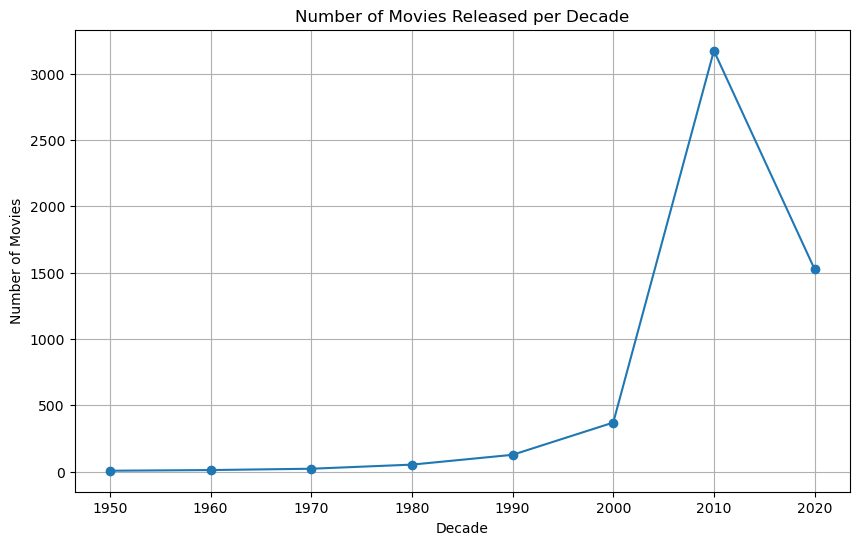

In [39]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Remove NaN values in 'release_year' column
df = df.dropna(subset=['release_year'])

# Define a function to categorize years into decades
def categorize_decade(year):
    return int(year // 10 * 10)

# Apply the categorization to create a new 'decade' column
df['decade'] = df['release_year'].apply(categorize_decade)

# Count the number of movies per decade
movies_per_decade = df['decade'].value_counts().sort_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(movies_per_decade.index, movies_per_decade.values, marker='o', linestyle='-')
plt.title('Number of Movies Released per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(movies_per_decade.index)
plt.grid(True)
plt.show()

### 2. Show the distribution of runtime features using an appropriate chart

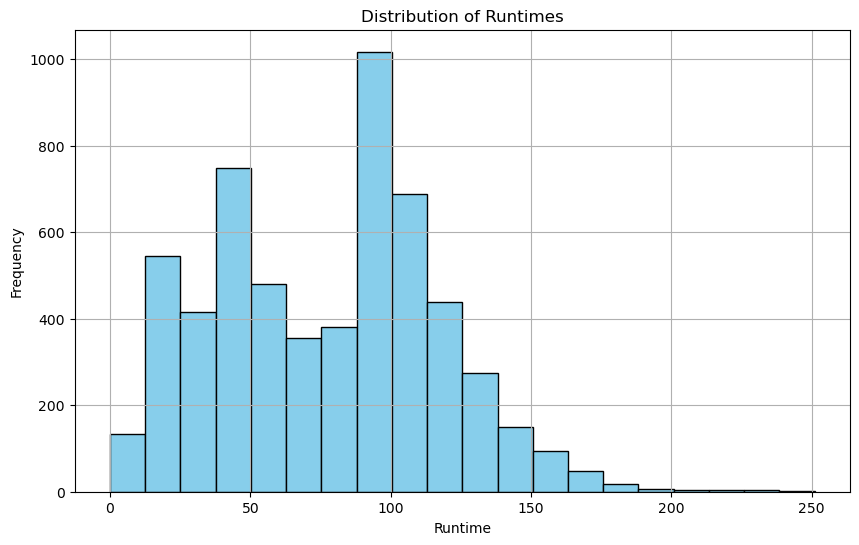

In [5]:
df["runtime"]
plt.figure(figsize=(10, 6))
plt.hist(df["runtime"], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Distribution of Runtimes')
plt.grid(True)
plt.show()

### 3. Show bar chart for movie genres

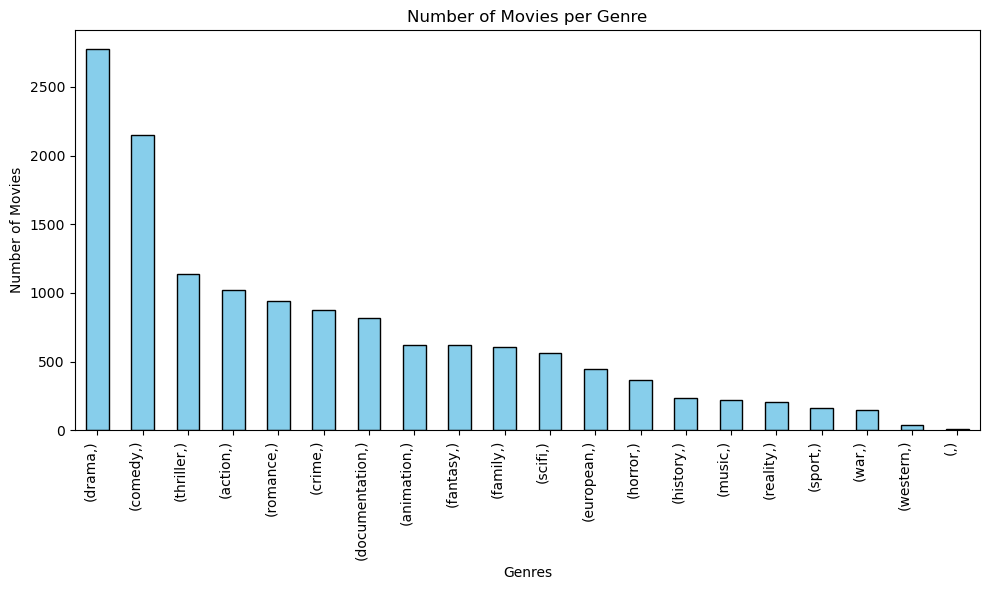

In [22]:
df["genres"].unique
# Extract movie genres from the DataFrame
df["genres"] = df['genres'].str.strip("[]").str.replace("'","").str.replace(", ",",")
all_genres = []
for g_list in df["genres"].str.split(","):
    all_genres = all_genres + g_list
all_genres

# Count the occurrences of each genre
genres_list = pd.DataFrame(all_genres)
genre_counts = genres_list.value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue', edgecolor = "black")
plt.title('Number of Movies per Genre')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.grid(False)
plt.show()

### 4. show bar chart for movie genres for children movies

In [7]:
df["age_certification"].unique()
children_movies = df[df['age_certification'].isin(['G', 'PG', 'TV-Y', 'TV-Y7'])]


In [27]:
children_genres = children_movies['genres'].explode().tolist()

In [28]:
genre_counts = pd.Series(children_genres).value_counts()

C:\Users\USER\AppData\Local\Temp\ipykernel_1816\3001766438.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


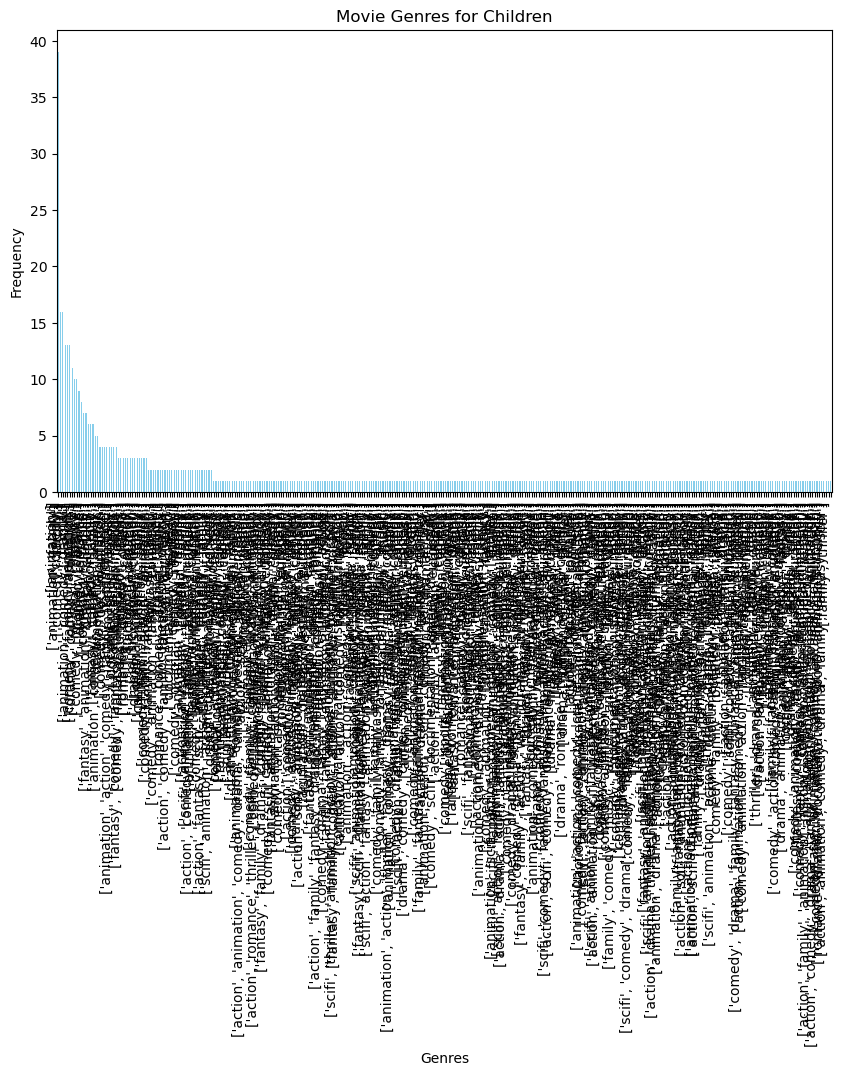

In [31]:
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Movie Genres for Children')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### 5. Which of the genres have the highest runtime on the overall dataset and for each age group

In [41]:
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
overall_max_runtime_genre = df.groupby('genres')['runtime'].max().idxmax()
print(f"The genre with the highest runtime in the overall movies is: {overall_max_runtime_genre}")


The genre with the highest runtime in the overall movies is: comedy,drama


In [42]:
def categories(rating):
    if pd.isna(rating):
        return "Others"
    elif "TV-14" in rating or "PG-13" in rating or "TV-Y7" in rating or "NC-17" in rating:
        return "Children"
    else:
        return "Adults"
df["age_group"] = df["age_certification"].apply(categories)

In [43]:
age_group_max_runtime_genre = df.groupby(['age_group', 'genres'])['runtime'].max().reset_index()
age_group_max_runtime_genre = age_group_max_runtime_genre.loc[age_group_max_runtime_genre.groupby('age_group')['runtime'].idxmax()]
print("The genre with the highest runtime for each age group is:")
age_group_max_runtime_genre

The genre with the highest runtime for each age group is:


,age_group,genres,runtime
389,Adults,"drama,crime,european",229
1226,Children,"romance,history,war,action,drama",213
1467,Others,"comedy,drama",235


### 6. What is the top 5 highest-rated movies or shows?

In [13]:
df['release_year'] = df['release_year'].astype(int)
top_rated = df.nlargest(5, 'imdb_score')[['title', 'type', 'imdb_score']]
print("Top 5 highest-rated movies or shows:")
print(top_rated)

Top 5 highest-rated movies or shows:
                           title  type  imdb_score
656                     Khawatir  SHOW         9.6
2927                    #ABtalks  SHOW         9.6
243                 Breaking Bad  SHOW         9.5
259   Avatar: The Last Airbender  SHOW         9.3
3320                  Our Planet  SHOW         9.3


### 7. What is the average runtime of movies released in the 1980s?

In [14]:
avg_runtime_1980s = df[(df['release_year'] >= 1980) & (df['release_year'] < 1990) & (df['type'] == 'MOVIE')]['runtime'].mean()
print("\nAverage runtime of movies released in the 1980s:", round(avg_runtime_1980s, 2), "minutes")


Average runtime of movies released in the 1980s: 123.36 minutes


### 8. What is the top 3 countries producing the most content?

In [20]:
top_countries = df['production_countries'].explode().value_counts().head(3)
print("\nTop 3 countries producing the most content:")
print(top_countries)


Top 3 countries producing the most content:
['US']    1804
['IN']     571
['JP']     244
Name: production_countries, dtype: int64


### 8. Which production country has the highest number of seasons for shows?

In [16]:
# Filtering for shows and finding the production country with the most seasons
shows = df[df['type'] == 'SHOW']
max_seasons_country = shows.groupby('production_countries')['seasons'].max().idxmax()
max_seasons_count = shows.groupby('production_countries')['seasons'].max().max()

print(f"The country with the most seasons for shows is {max_seasons_country} with {max_seasons_count} seasons.")

The country with the most seasons for shows is ['US'] with 42.0 seasons.


### 9. What is the correlation between runtime and IMDb score for 1980s movies?

In [17]:
movies_1980s = df[(df['type'] == 'MOVIE') & (df['release_year'] >= 1980) & (df['release_year'] <= 1989)]
correlation = movies_1980s[['runtime', 'imdb_score']].corr()
print("Correlation between runtime and IMDb score for 1980s movies:")
print(correlation)

Correlation between runtime and IMDb score for 1980s movies:
             runtime  imdb_score
runtime     1.000000   -0.309252
imdb_score -0.309252    1.000000


### 10. Are there any trends in IMDb scores over the decades (e.g., increasing or decreasing)?

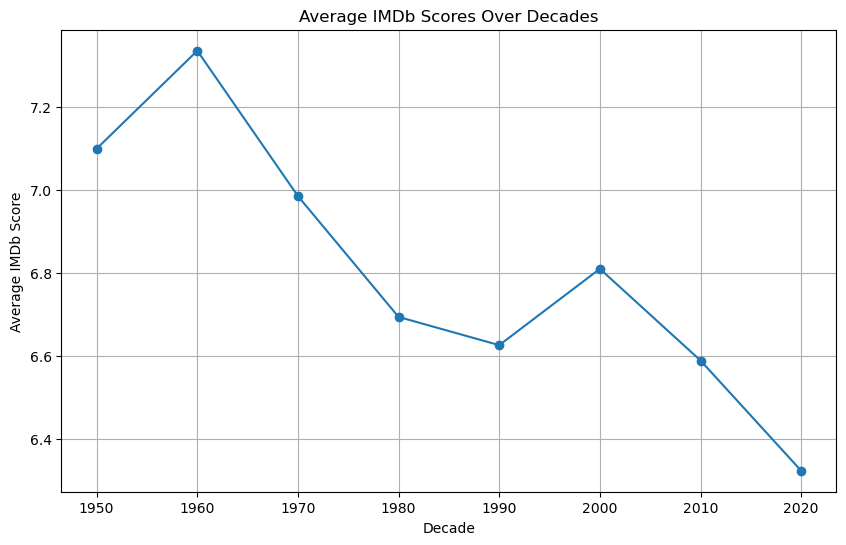

In [18]:
df = df.dropna(subset=['imdb_score'])

# Define the decades
df['decade'] = df['release_year'] // 10 * 10

# Calculate average IMDb score per decade
average_scores = df.groupby('decade')['imdb_score'].mean()

# Plotting the trend
plt.figure(figsize=(10, 6))
plt.plot(average_scores.index, average_scores.values, marker='o', linestyle='-')
plt.title('Average IMDb Scores Over Decades')
plt.xlabel('Decade')
plt.ylabel('Average IMDb Score')
plt.grid(True)
plt.show()